In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Visualization ##

#### Watch Demo Video Below

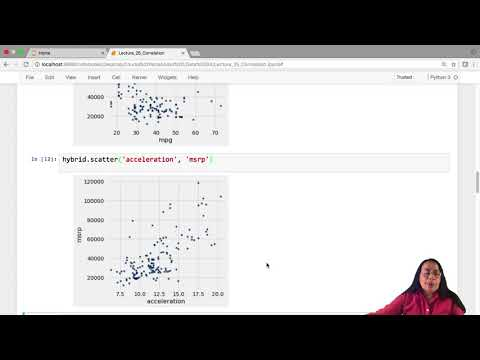

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('k9-rzXYH11Q', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
galton = Table.read_table('galton.csv')

In [ ]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')

In [ ]:
hybrid = Table.read_table('hybrid.csv')

In [ ]:
hybrid

In [ ]:
hybrid.scatter('mpg', 'msrp')

In [ ]:
hybrid.scatter('acceleration', 'msrp')

In [ ]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

In [ ]:
suv.scatter('mpg', 'msrp')

In [ ]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [ ]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Calculation ##

#### Watch Demo Video Below

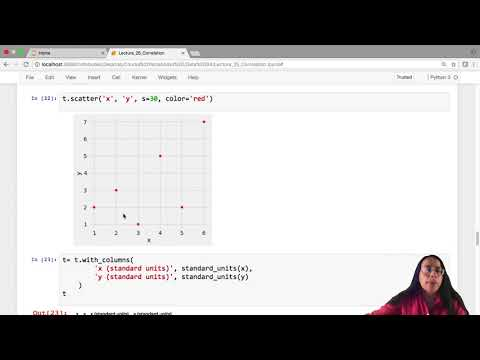

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('uBN0NyAb8GU', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
# Draws a scatter diagram of variables that have the specified correlation

r_scatter(0.6)

In [ ]:
r_scatter(0)

### Calculating $r$ ###

In [ ]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t= t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

In [ ]:
su_product = t.column(2) * t.column(3)
t = t.with_column('product of standard units', su_product)
t

In [ ]:
# r is the average of the products of standard units

r = np.mean(t.column(4))
r

In [ ]:
def correlation(tbl, x, y):
    """tbl is a table; 
    x and y are column labels"""
    x_in_standard_units = standard_units(tbl.column(x))
    y_in_standard_units = standard_units(tbl.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)  

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
correlation(suv, 'mpg', 'msrp')

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
correlation(t, 'y', 'x')

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t.scatter('y', 'x', s=30, color='red')

In [ ]:
correlation(t, 'y', 'x')

## Interpretation ##

#### Watch Demo Video Below

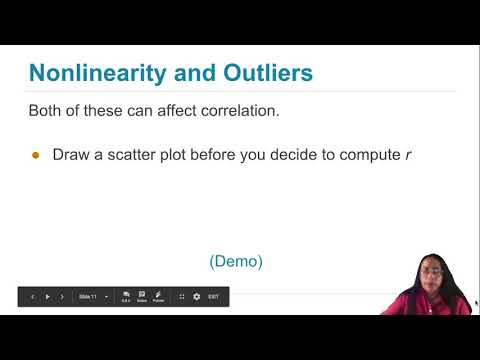

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('-n8LgiYXoXU', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

### Nonlinearity ###

In [ ]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(nonlinear, 'x', 'y')

### Outliers ###

In [ ]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(line, 'x', 'y')

In [ ]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(outlier, 'x', 'y')

### Ecological Correlation ###

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')